In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df=pd.read_csv('D:\ExcelR\multiple lin reg5\ToyotaCorolla.csv')

In [3]:
df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [4]:
df1=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [5]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
df1.rename(columns = {'Age_08_04':"Age","Quarterly_Tax":"Qtax","cc":"CC"}, inplace = True)
df1

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Qtax    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
df1.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
Qtax      0
Weight    0
dtype: int64

In [9]:
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
df1.drop_duplicates().reset_index(drop=True)

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Correlation Matrix

In [11]:
df1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Qtax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables along with histograms

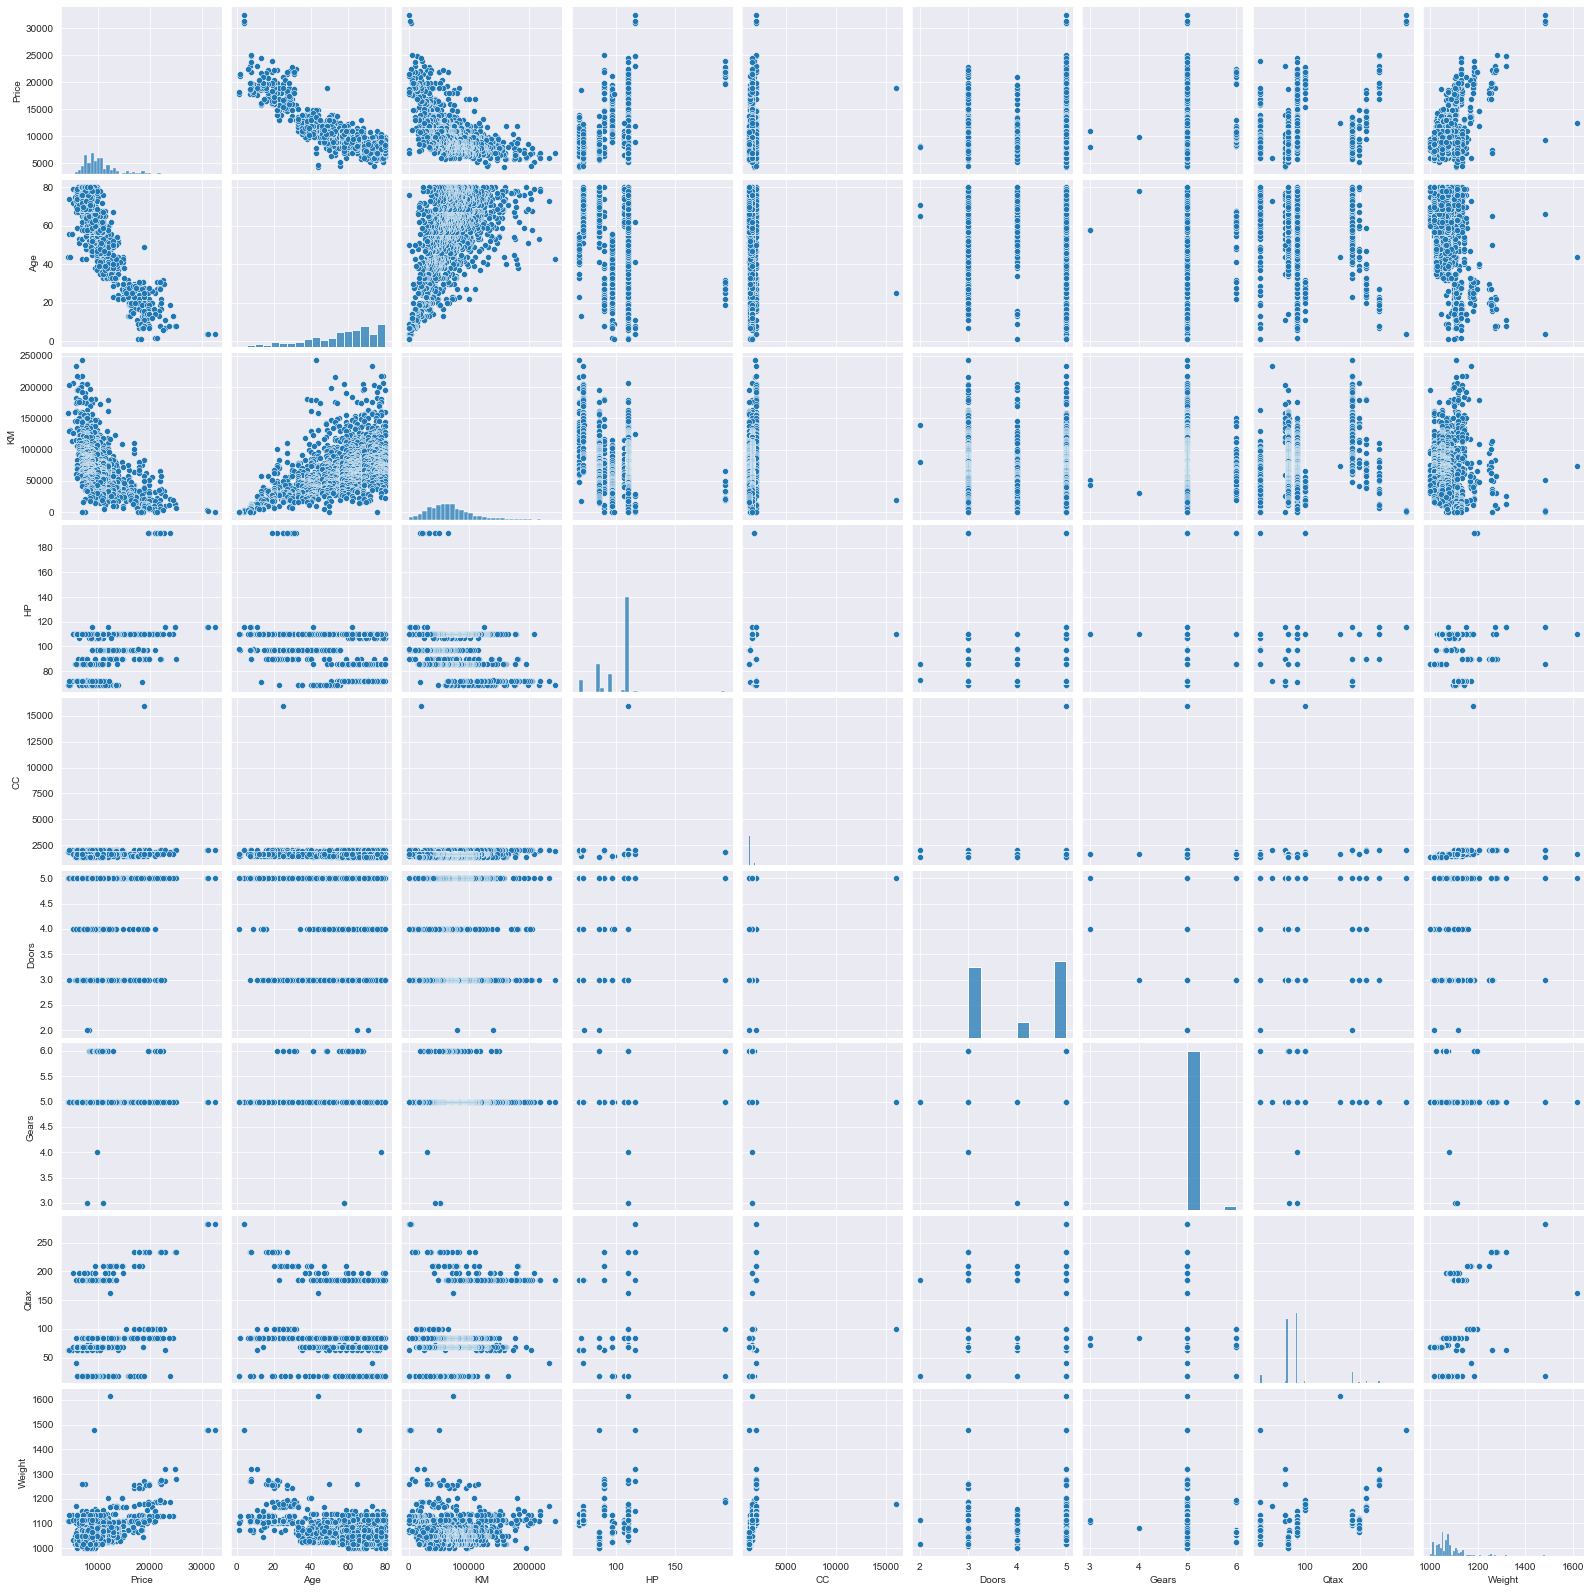

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

# Preparing a model for predicting Price


In [13]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=df1).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:12:51   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Qtax           3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
ml_values=(model.rsquared,model.rsquared_adj,model.aic)
ml_values

(0.8637627463428192, 0.8629989775766963, 24769.07664007625)

In [16]:
#pvalues of CC and Door is greather than 0.05 so CC & Door is insignificant
#NOW we check independently wheter it is significant are not

In [17]:
ml_cc=smf.ols('Price~CC',data=df1).fit()

In [18]:
np.round(ml_cc.pvalues,6) #CC is significant 

Intercept    0.000000
CC           0.000002
dtype: float64

In [19]:
ml_D=smf.ols('Price~Doors',data=df1).fit()#Doors is significant 
np.round(ml_D.pvalues,6)

Intercept    0.0
Doors        0.0
dtype: float64

In [20]:
ml_D_CC=smf.ols('Price~Doors+CC',data=df1).fit()

np.round(ml_D_CC.pvalues,6)#CC & Doors are significant 

Intercept    0.000000
Doors        0.000000
CC           0.000015
dtype: float64

In [21]:
ml_D_C=smf.ols('Price~Doors+CC',data=df1).fit().pvalues
np.round(ml_D_C,6)

Intercept    0.000000
Doors        0.000000
CC           0.000015
dtype: float64

# Calculating VIF

In [22]:
#'Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight'

In [23]:
rsq_age=smf.ols('Age~+KM+HP+CC+Doors+Gears+Qtax+Weight',data=df1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols("KM~HP+CC+Doors+Gears+Qtax+Weight+Age",data=df1).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols("HP~CC+Doors+Gears+Qtax+Weight+Age+KM",data=df1).fit().rsquared
vif_hp=1/(1-rsq_km)

rsq_cc=smf.ols("CC~Doors+Gears+Qtax+Weight+Age+KM+HP",data=df1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols("Doors~Gears+Qtax+Weight+Age+KM+HP+CC",data=df1).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols("Gears~Qtax+Weight+Age+KM+HP+CC+Doors",data=df1).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_qtax=smf.ols("Qtax~Weight+Age+KM+HP+CC+Doors+Gears",data=df1).fit().rsquared
vif_qtax=1/(1-rsq_qtax)

rsq_weight=smf.ols("Weight~Age+KM+HP+CC+Doors+Gears+Qtax",data=df1).fit().rsquared
vif_weight=1/(1-rsq_weight)

# data frame creation 
d1={"variables":["Age","KM","HP","CC","Doors","Gears","Qtax","Weight"],"VIF":[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qtax,vif_weight]}
vif=pd.DataFrame(d1)
vif

,variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.756905
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Qtax,2.311431
7,Weight,2.516420


In [24]:
#all VIF values are lower than 2.5 so the correlation is low,all are can acceptable Regression

# Residual Analysis



# Test for Normality of Residuals (Q-Q Plot)

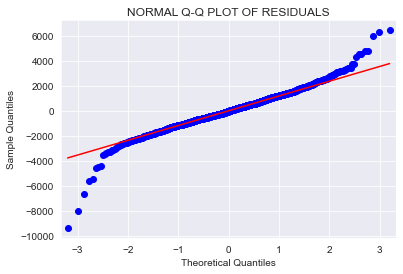

In [25]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line="q")
plt.title('NORMAL Q-Q PLOT OF RESIDUALS')
plt.show()

In [26]:
#all are outliar from above QQ plot of residuals

In [27]:
list(np.where(model.resid>4500))

[array([ 109,  110,  111,  147,  171,  523, 1058], dtype=int64)]

In [28]:
list(np.where(model.resid<=4500))


[array([   0,    1,    2, ..., 1433, 1434, 1435], dtype=int64)]

# Residual Plot for Homoscedasticity

In [29]:
#Residual Plot for finding weather there is  Homoscedasticity or not

In [30]:
#standardized_values mend convert into z score =(x-u)/6
def get_standardize_values (vals):
    return (vals - vals.mean())/vals.std()

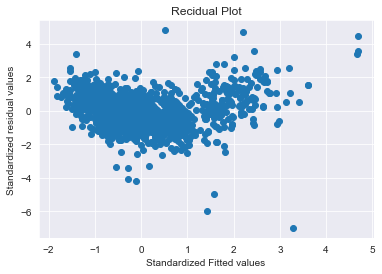

In [31]:
plt.scatter(get_standardize_values(model.fittedvalues),
           get_standardize_values(model.resid))
plt.title('Recidual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [32]:
#getting random cloud no patterm mean value =0,having constant varialbs
# shows outlies are there


# Residual Vs Regressors


In [33]:
# Test for errors or Residuals Vs Regressors or independent

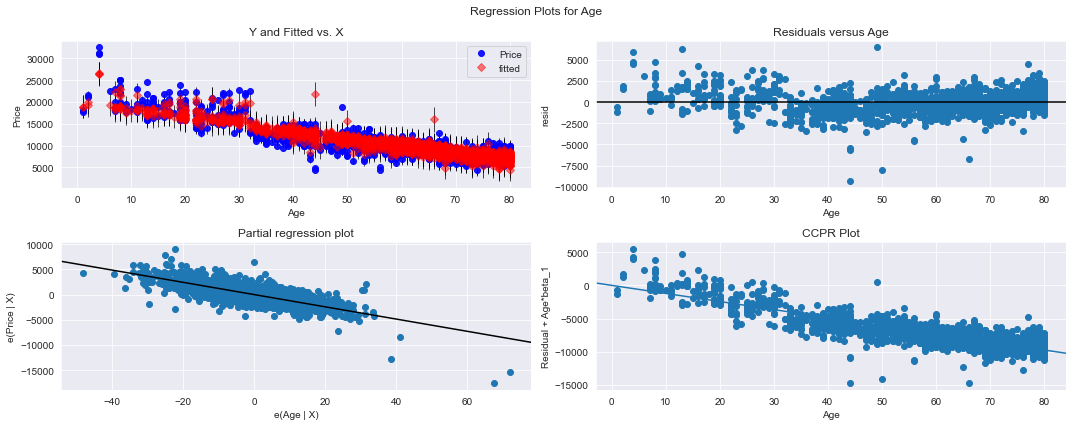

In [34]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

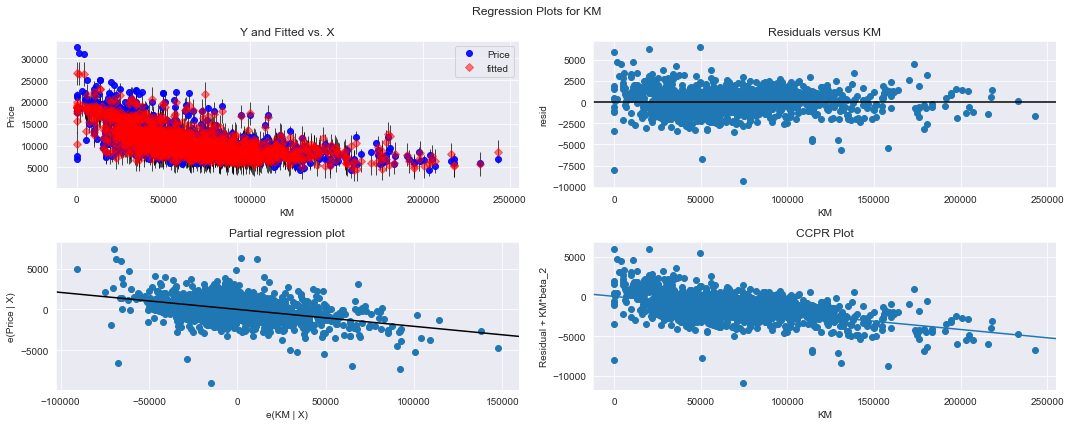

In [35]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

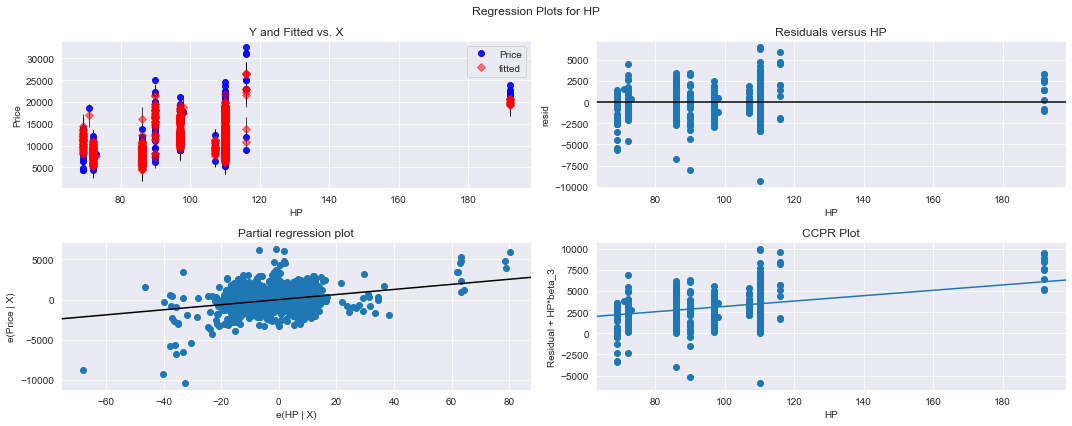

In [36]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

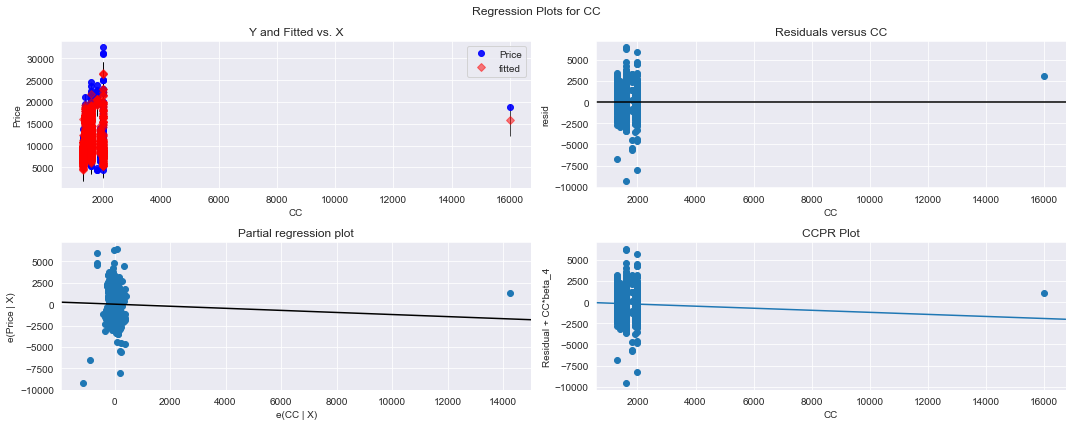

In [37]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

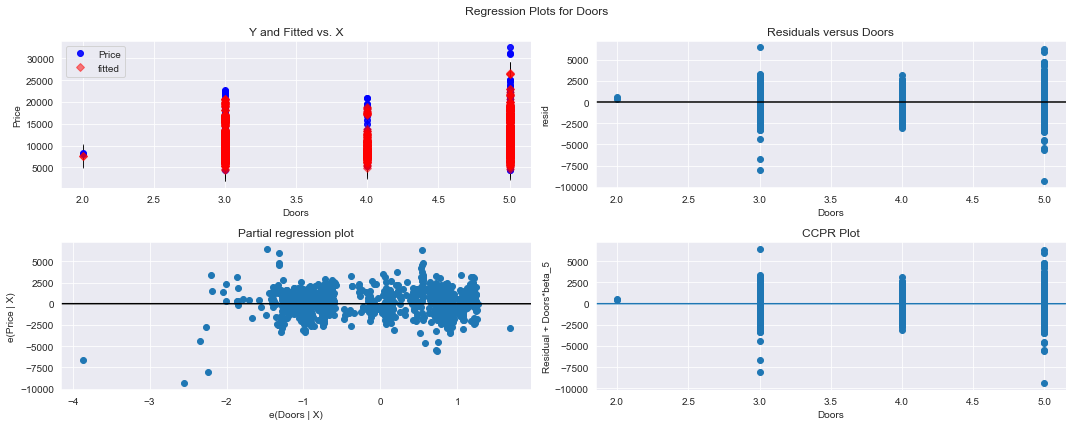

In [38]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

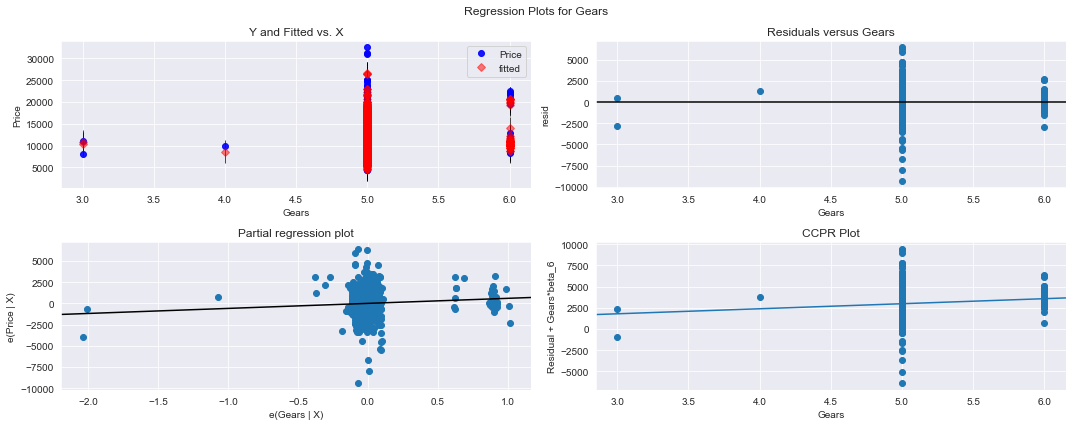

In [39]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

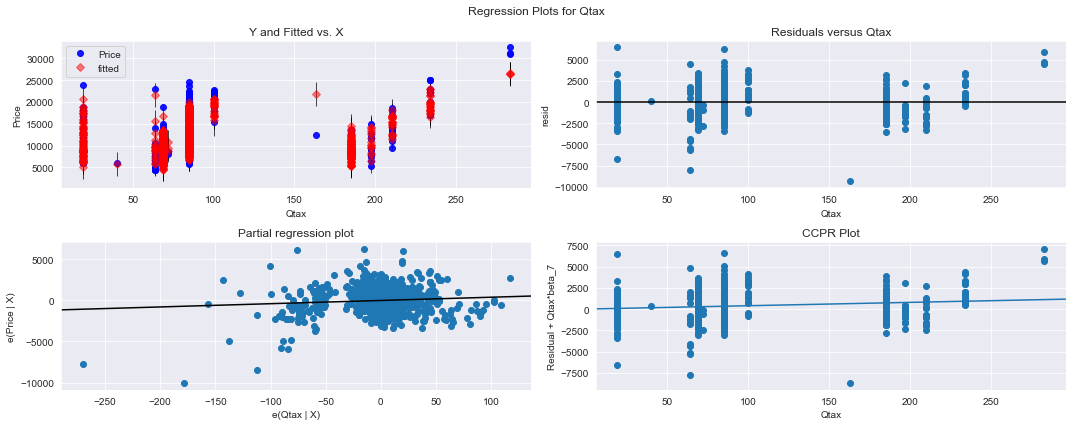

In [40]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model,'Qtax',fig=fig)
plt.show()

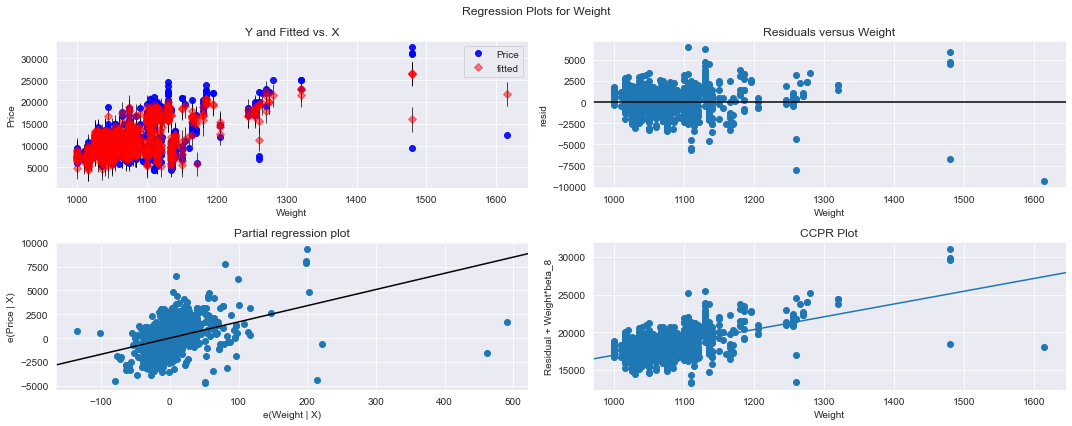

In [41]:
fig=plt.figure(figsize=(15,6))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers


# Cook’s Distance

In [42]:
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance

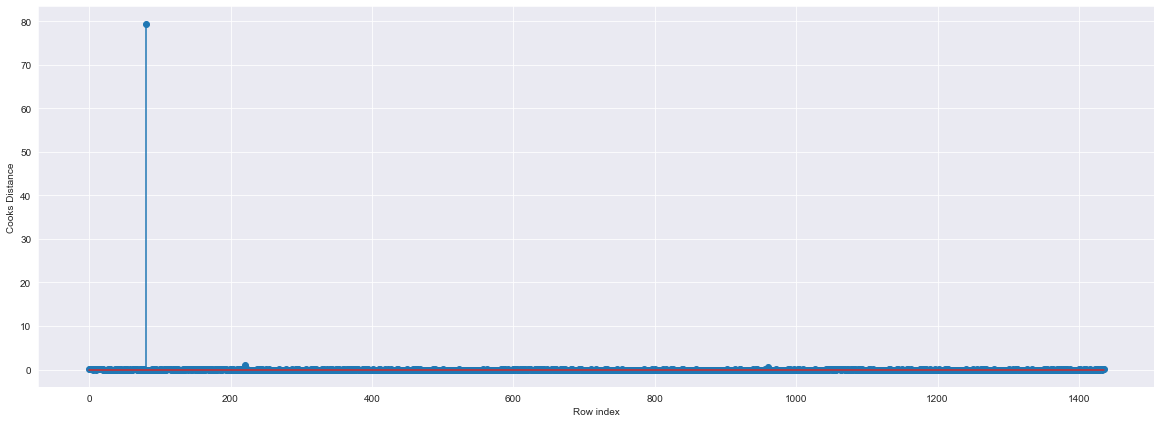

In [43]:
#Plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c ,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:

#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))


(80, 79.52010624138055)

In [45]:
#80 row is outlier & cooks dist {np.max(c)}is 79.520

# High Influence points

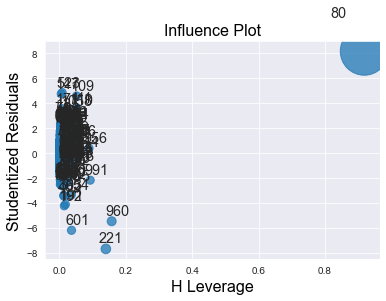

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [47]:
#From the above plot, it is evident that data point 80 the influencers

In [48]:
k = df1.shape[1]#column
n = df1.shape[0]#row
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [49]:
df1[df1.index.isin([80])]


,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model

In [50]:
toyota=df1.copy()
toyota

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [51]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota1=toyota.drop(toyota.index[[80]],axis=0).reset_index()
toyota1


,index,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [52]:
#Drop the original index ,because index to arrange properly after removing 76
toyota1=toyota1.drop(['index'],axis=1)

In [53]:
toyota1

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Buliding reggresioin model after removing most influencing DataPoint

In [54]:
model2=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=toyota1).fit()

In [55]:
model2_values=model2.rsquared,model2.rsquared_adj,model2.aic
model2_values

(0.8693790488655819, 0.8686462525057815, 24687.28102432684)

In [56]:
#imporoving model
model2_influence=model2.get_influence()
(c, _)=model2_influence.cooks_distance

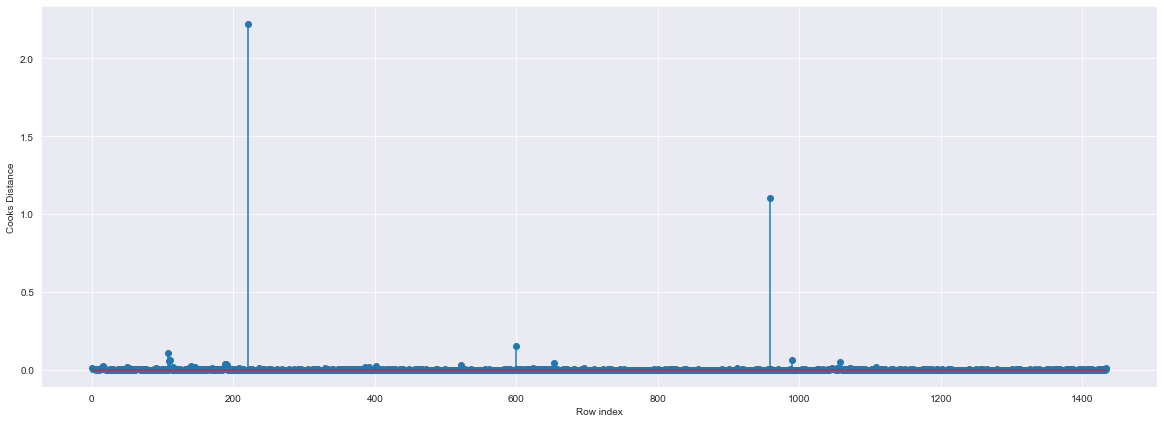

In [57]:
#Plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c ,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [58]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))


(220, 2.2244611713001508)

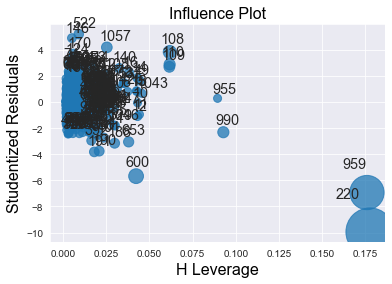

In [59]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [60]:
toyota2=toyota1.drop(toyota1.index[[220,959,955]],axis=0).reset_index()
toyota2

,index,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1430,7500,69,20544,86,1300,3,5,69,1025
1428,1431,10845,72,19000,86,1300,3,5,69,1015
1429,1432,8500,71,17016,86,1300,3,5,69,1015
1430,1433,7250,70,16916,86,1300,3,5,69,1015


In [61]:
toyota2=toyota2.drop(['index'],axis=1)

In [62]:
model3=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=toyota2).fit()

In [63]:
model3_influence = model3.get_influence()
(toyota2, _) = model3_influence.cooks_distance

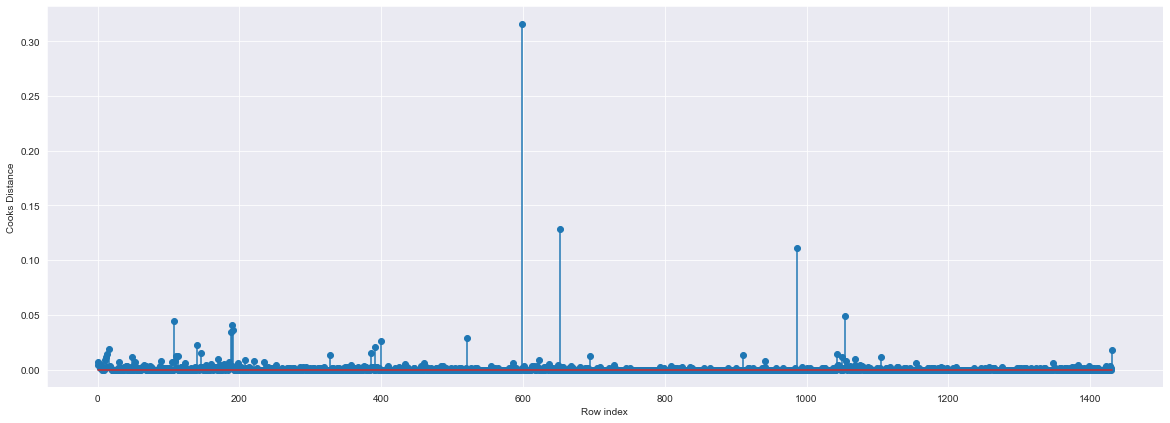

In [64]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota2)), np.round(toyota2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [65]:
(np.argmax(toyota2),np.max(toyota2))

(599, 0.3164834474736608)

In [66]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model


In [ ]:
model3=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=toyota2).fit()

In [67]:
model3_values=model3.rsquared,model3.rsquared_adj,model3.aic
model3_values

(0.8851843248241645, 0.8845388396510045, 24453.651000772363)

In [68]:
model3.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 291


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1371.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:13:14   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.475e+04   1451.620    -10.160      0.000   -1.76e+04   -1.19e+04
Age         -112.0193      2.481    -45.159      0.000    -116.885    -107.153
KM            -0.0170      0.001    -14.154      0.000      -0.019      -0.015
HP            36.6034      2.755     13.287      0.000      31.199      42.007
CC            -3.7953      0.302    -12.554      0.000      -4.388      -3.202
Doors       -122.5080     37.525     -3.265      0.001    -196.118     -48.898
Gears        466.2973    189.543      2.460      0.014      94.484     838.111
Qtax           5.2131      1.372      3.800      0.000       2.522       7.904
Weight        30.6388      1.291     23.727      0.000      28.106      33.172
==============================================================================
Omnibus:                      121.587   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.166
Skew:                          -0.082   Prob(JB):                    3.36e-153
Kurtosis:                       6.427   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model_values_df=pd.DataFrame({'model 1':ml_values,'model 2':model2_values,'Final Model':model3_values},index=['rsquared','rsquared_adj','AIC'])
model_values_df

,model 1,model 2,Final Model
rsquared,0.863763,0.869379,0.885184
rsquared_adj,0.862999,0.868646,0.884539
AIC,24769.076640,24687.281024,24453.651001


Here we can see the r-squared values is higher and AIC value is lesser for final model by which we can say the final model is better.

# Predicting for new data

In [70]:
new_data=pd.DataFrame({'Age':19,"KM":80000,"HP":60,"CC":1500,"Doors":4,"Gears":5,"Qtax":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,19,80000,60,1500,4,5,69,1012


In [71]:
model3.predict(new_data)

0    11474.57112
dtype: float64